# Finding Heavy Traffic Indicators on I-94

The goal of this project is to determine indicators of heavy traffic, such as weather type, time of day, time of week, etc. 

In order to do this, we are going to be analyzing a dataset about the westbound traffic on I-94

This dataset is avaiable on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

In [1]:
import pandas as pd

metro = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

metro

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [2]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We can see that each column has 48204 values, and all of them are non-null values. The data was gathered with regards to a specific station along the I-94, and registered data from east to west. 

## Analyzing Traffic Volume

Given that the traffic_volume column is an int64 type and takes the number of cars that crossed the station at a given hour, we can put the values in a histogram to try to gather information from its distribution. 

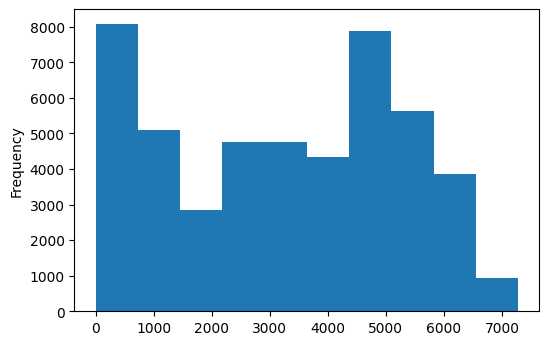

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

metro['traffic_volume'].plot.hist()
plt.show()

In [4]:
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The distribution of the traffic_volume column is primarily left skewed. 25% of the data is contained within the first two columns on the histogram. This means that either 1193 cars or fewer were passing the station each hour, which could potentially relate to it being nighttime, and there being fewer cars out. On the other side, there were between 4933 and 7280 cars passing the station on the other 25%, which could translate to the busiest hours of the day. Daytime and nighttime could potentially influence  the traffic volume, given that this column gathers information at every hour.

## Traffic Volume: Day vs. Night

With the above inference in mind, we can try to analyze the trends in the data given the time that it was gathered at. We can separate the data given its time by hour. 

In [5]:
metro['date_time'] = pd.to_datetime(metro['date_time'])

In [6]:
day_info = metro.copy()[(metro['date_time'].dt.hour >= 7) & (metro['date_time'].dt.hour < 19)]
night_info = metro.copy()[(metro['date_time'].dt.hour < 7) | (metro['date_time'].dt.hour >= 19)]

day_info.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [7]:
night_info.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


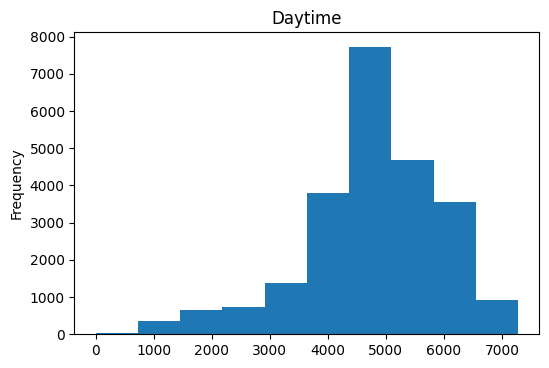

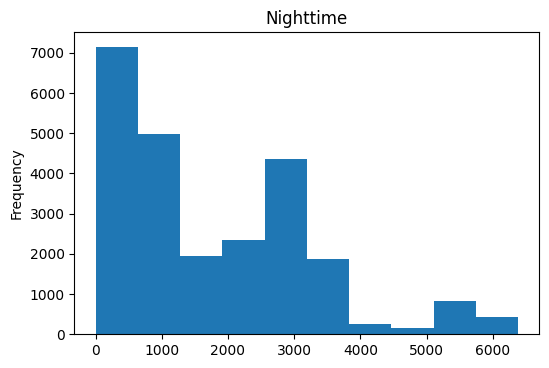

In [8]:
day_info['traffic_volume'].plot.hist()
plt.title('Daytime')
plt.show()

night_info['traffic_volume'].plot.hist()
plt.title('Nighttime')
plt.show()

From the above descriptions, we can tell that the high traffic volume tends to be during the daytime hours, and the low traffic tends to be towards the nighttime. In the daytime, there are more than 4252 cars passing through the station every hour 75% of the time, and during nighttime, there are less than 2819 cars passing through the station 75% of the time. The histograms also reflect this, as the daytime histogram has most of its values in the 4000-7000 range (skewed left). The nighttime histogram, however, has most of its values in the 0-3000 range (skewed right). If our goal was to find indicators of heavy traffic, we would probably be using daytime data instead of nighttime data. 

## Time Indicators

One of the possible indicators that we can look for is time. There might be more people on the road at a certain day or on certain times of the day. We are going to analyze traffic by month, day of the week, and time of day. 

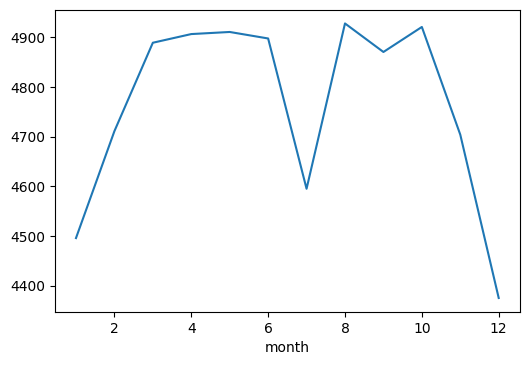

In [9]:
day_info['month'] = day_info['date_time'].dt.month
by_month = day_info.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

We can see that generally, in the winter months, there is less traffic on I-94, which are December and January. In the rest of the year, traffic turns to pretty steady levels, although there is an exception in July. Traffic dies down for that month before going back in August. 

We will now analyze the variability of traffic with regards to the day of the week. 

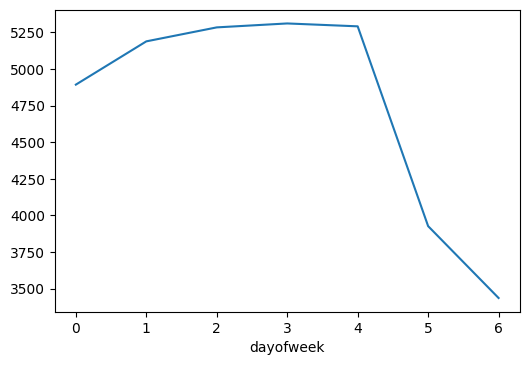

In [10]:
day_info['dayofweek'] = day_info['date_time'].dt.dayofweek
by_dayofweek = day_info.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Given that day 0 of the week starts correlates to Monday and day 6 of the week correlates to Sunday, we can see that there is significantly less traffic on the weekends compared to teh weekday. Traffic from Monday to Friday either increases or stays constant, and on Saturday, the number of cars that pass the I-94 decrease by nearly a thousand. On Sunday, it decreases by another 500. 

The final time indicator that we will analyze is hour of the day. We knew that there was a massive difference in traffic from daytime to nighttime, but we could potentially gather more information if we plot by hour. 

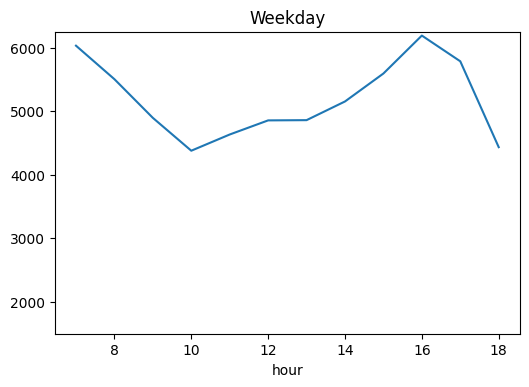

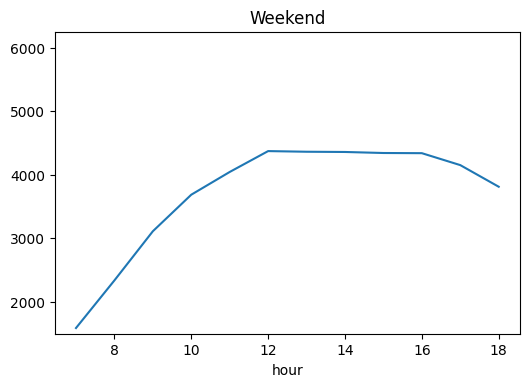

In [11]:
day_info['hour'] = day_info['date_time'].dt.hour
bussiness_days = day_info.copy()[day_info['dayofweek'] <= 4] # 4 == Friday
weekend = day_info.copy()[day_info['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

by_hour_business['traffic_volume'].plot.line()
plt.title('Weekday')
plt.ylim(1500,6250)
plt.show()
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend')
plt.ylim(1500,6250)
plt.show()

We can see that in the weekday, the traffic is super high compared to the weekend. Even in the busiest hours during the weekend, most hours of the weekend have busier traffic than the busiest hours of the weekend. The weekend ranges from 1500 cars to 4500 cars passing the station every hour, with the busiest hours being from 12:00 - 16:00, and in the weekday, traffic ranges from 4500 - 6000 cars passing the station every hour, with the busiest hour being 7:00 and 16:00. 

Summarizing all of the traffic indicators, we figured out that the busiest times for traffic are during the warmer months, from March to October excluding July. We also figured out that the weekdays at 7:00 and 16:00 are the busiest times of the day. 

## Weather Indicators

Another possible indicator of heavy traffic can be the weather. In order to find potential areas of correlation, we can list out what columns have the strongest correlation between each other. 

In [12]:
day_info.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

We can see that the temperature column has the strongest correlation with +0.12. We can plot a scatter plot for this column to try and make any observations about weather. 

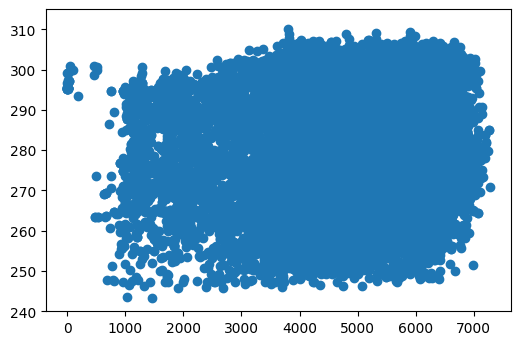

In [13]:
plt.scatter(day_info['traffic_volume'], day_info['temp'])
plt.ylim(240,315)
plt.show()

We can see here that there are no visible observations we can make about the temperature with relation to traffic volume. However, there are other possible indicators of weather that we can use to find any information. 

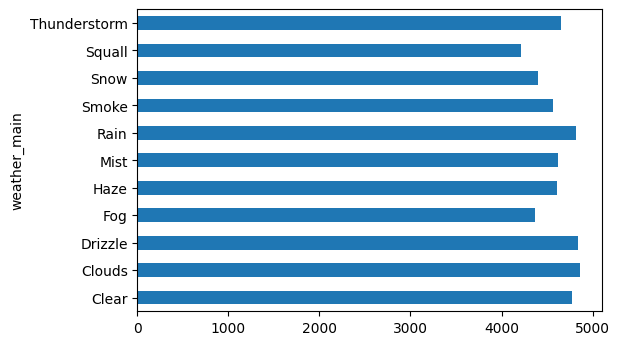

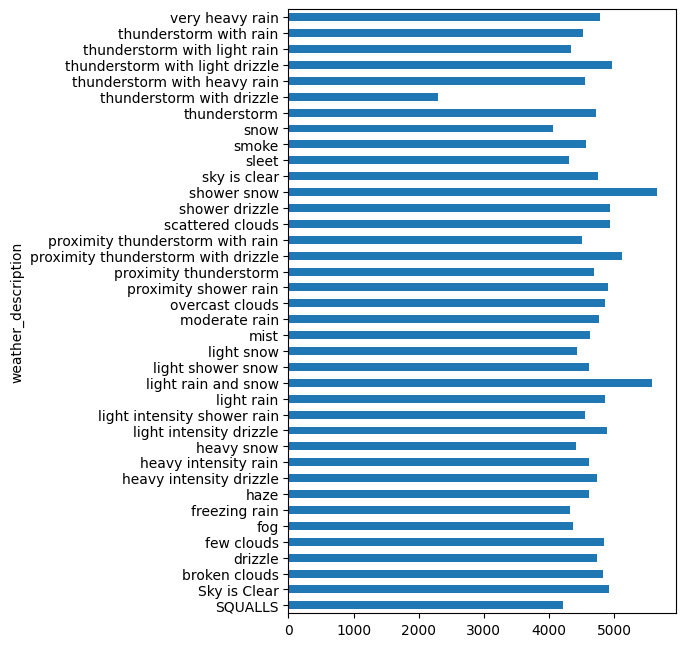

In [14]:
by_weather_main = day_info.groupby('weather_main').mean()
by_weather_description = day_info.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.show()
by_weather_description['traffic_volume'].plot.barh(figsize=(5, 8))
plt.show()

While in the first bar plot, there aren't any observations we can make, we can see that there are a couple of values in the second plot that surpass 5000, those being "shower snow", "light rain and snow", and "proximity thunderstorm with drizzle" that have the highest traffic volume. The rest of the data is genreally uniform. 

## Conclusion

In total, all of our analysis leads us to a few heavy traffic indicators

* Warmer months (March - November)
* Weekdays
* Daytime (7:00 and 16:00)
* Shower Snow (Weather)
* Light Rain and Snow (Weather)
* Proximity Thunderstorm with Drizzle (Weather)